
# 08. Redes neuronales convolucionales
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


TensorFlow 2.x selected.
2.1.0-rc1


## Datos digits MNIST

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [3]:

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

In [6]:
from keras.utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)


Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [7]:

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.9310 - accuracy: 0.7577
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2706 - accuracy: 0.9194
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1943 - accuracy: 0.9421
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1529 - accuracy: 0.9553
Epoch 5/5
10000/10000 [==============================] - 1s 76us/sample - loss: 0.1070 - accuracy: 0.9700
Test accuracy: 0.97


## Datos Fashion-MNIST

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

Modelo 1: modelo de base basado en el mismo modelo que el usado para el conjunto datos digits MNIST 

In [0]:

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
__________________________________________________

In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.8425 - accuracy: 0.6980
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5186 - accuracy: 0.8138
Epoch 3/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4547 - accuracy: 0.8384
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4177 - accuracy: 0.8527
Epoch 5/5
10000/10000 [==============================] - 1s 67us/sample - loss: 0.3996 - accuracy: 0.8593
Test accuracy: 0.8593


In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

Volvemos las imagenes a formato original para hacer el plot

In [0]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

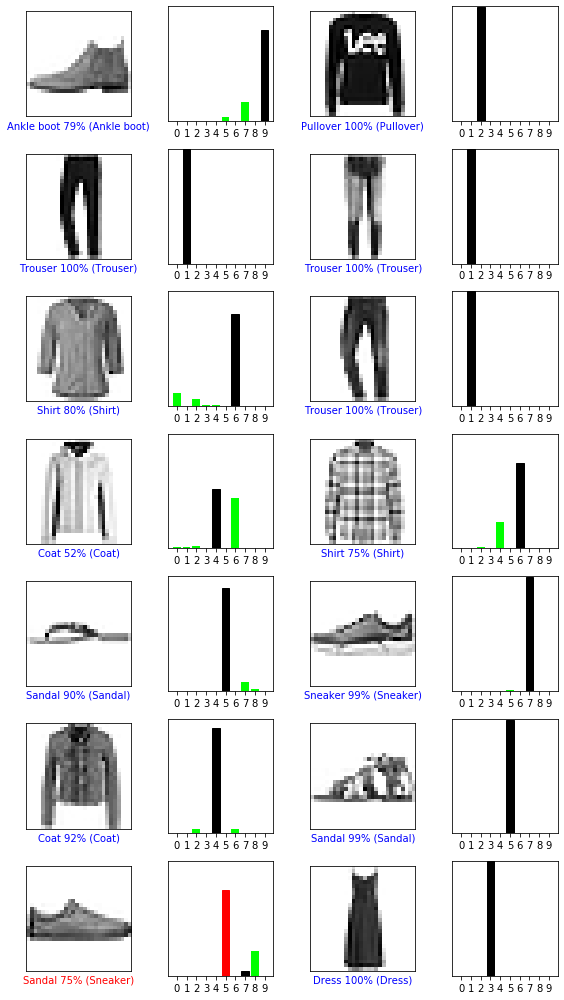

In [17]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


Modelo 2: Duplicando las neuronas de modelo base y añadiendo una capa densa de 64 neuronas

In [0]:

model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))



In [20]:

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.7661 - accuracy: 0.7264
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4844 - accuracy: 0.8240
Epoch 3/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4181 - accuracy: 0.8500
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3796 - accuracy: 0.8641
Epoch 5/5
10000/10000 [==============================] - 1s 72us/sample - loss: 0.3737 - accuracy: 0.8628

Test accuracy: 0.8628


Modelo 3: modelo 3 cambiando al optimizador 'adam'

In [21]:
model = Sequential()

model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4139 - accuracy: 0.8510
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2719 - accuracy: 0.9001
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2276 - accuracy: 0.9152
Epoch 4/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1990 - accuracy: 0.9260
Epoch 5/5
10000/10000 [==============================] - 1s 72us/sample - loss: 0.2440 - accuracy: 0.9099

Test accuracy: 0.9099


Modelo 4: Buscando un modelo más complejo que usa capas BathNormalization y Dropout

In [0]:
from tensorflow.keras.layers import Dropout, BatchNormalization


def make_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
    
  model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  return model



In [23]:
model = make_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 227us/sample - loss: 0.5052 - accuracy: 0.8259
Epoch 2/5
60000/60000 [==============================] - 13s 210us/sample - loss: 0.3161 - accuracy: 0.8894
Epoch 3/5
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2763 - accuracy: 0.9017
Epoch 4/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.2481 - accuracy: 0.9124
Epoch 5/5
10000/10000 [==============================] - 1s 111us/sample - loss: 0.2030 - accuracy: 0.9256

Test accuracy: 0.9256


Modelo 5: Modelo anterior añadiendo más epochs (10 epochs)

In [32]:

model = make_model()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.5098 - accuracy: 0.8217
Epoch 2/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3239 - accuracy: 0.8857
Epoch 3/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2839 - accuracy: 0.8990
Epoch 4/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2501 - accuracy: 0.9107
Epoch 5/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2228 - accuracy: 0.9201
Epoch 6/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2050 - accuracy: 0.9273
Epoch 7/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.1893 - accuracy: 0.9324
Epoch 8/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.1733 - accuracy: 0.9385
Epoch 9/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.1661 - accuracy: 0.9

Modelo 6: Modelo anterior añadiendo más epochs (30 epochs)

In [33]:

model = make_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=30)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 226us/sample - loss: 0.5218 - accuracy: 0.8189
Epoch 2/30
60000/60000 [==============================] - 13s 213us/sample - loss: 0.3229 - accuracy: 0.8865
Epoch 3/30
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2865 - accuracy: 0.8982
Epoch 4/30
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2493 - accuracy: 0.9110
Epoch 5/30
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2243 - accuracy: 0.9214
Epoch 6/30
60000/60000 [==============================] - 13s 213us/sample - loss: 0.2036 - accuracy: 0.9283
Epoch 7/30
60000/60000 [==============================] - 13s 211us/sample - loss: 0.1881 - accuracy: 0.9330
Epoch 8/30
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1695 - accuracy: 0.9391
Epoch 9/30
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1597 - accuracy: 0.9

Modelo 7: Modelo anterior añadiendo más epochs (30 epochs) y diferentes hiperparámetros al optimizador Adam

In [26]:
model = make_model()

optimizer = tf.keras.optimizers.Adam (lr=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

model.fit(train_images, train_labels, epochs=30, callbacks=[reduce_lr])

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 228us/sample - loss: 0.5048 - accuracy: 0.8254
Epoch 2/30
60000/60000 [==============================] - 13s 210us/sample - loss: 0.3187 - accuracy: 0.8865
Epoch 3/30
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2693 - accuracy: 0.9048
Epoch 4/30
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2380 - accuracy: 0.9158
Epoch 5/30
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2110 - accuracy: 0.9270
Epoch 6/30
60000/60000 [==============================] - 13s 213us/sample - loss: 0.1849 - accuracy: 0.9345
Epoch 7/30
60000/60000 [==============================] - 13s 210us/sample - loss: 0.1672 - accuracy: 0.9411
Epoch 8/30
60000/60000 [==============================] - 13s 211us/sample - loss: 0.1503 - accuracy: 0.9476
Epoch 9/30
60000/60000 [==============================] - 13s 210us/sample - loss: 0.1367 - accuracy: 0.9

Visualización de las predicciones del modelo 7

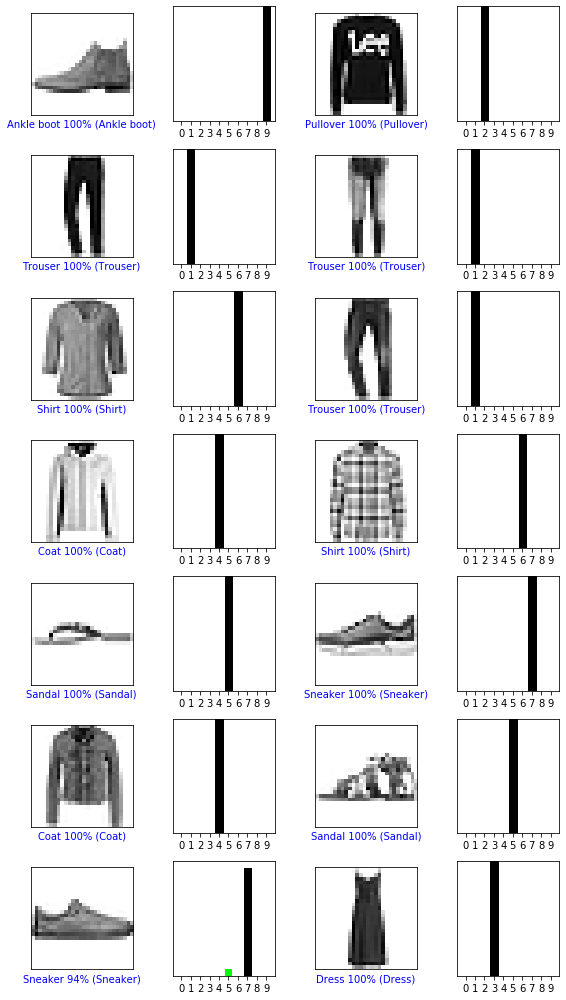

In [27]:

predictions = model.predict(test_images)

train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))


num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()